 1. Introduction

In this project, I explore the relationship between gun background checks (from FBI NICS data) and U.S. census demographic indicators across states. The goal is to understand how factors such as population, income, and education level correlate with gun-related activity across the U.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
gun_data = pd.read_excel('gun_data.xlsx')
census = pd.read_csv('U.S. Census Data.csv')

gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%



### Data Cleaning

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# 1. Transpose census data
census_long= census.set_index('Fact').T.reset_index()

# 2. Rename the index column to 'state'
census_long= census_long.rename(columns= {'index': 'state'})

# 3. Drop the row where 'state' is 'Fact Note'
census_long = census_long[census_long['state'] != 'Fact Note']

census_long.head()


Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
1,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
gun_state_totals= gun_data.groupby('state', as_index= False)['totals'].sum()
gun_state_totals = gun_state_totals.drop_duplicates()
gun_state_totals.head()

,state,totals
0,Alabama,6706079
1,Alaska,1137643
2,Arizona,4425714
3,Arkansas,3752633
4,California,19014063


In [6]:
# Check column names
print("Gun state totals columns:", gun_state_totals.columns.tolist())
print("Census long columns:", census_long.columns.tolist())


Gun state totals columns: ['state', 'totals']
Census long columns: ['state', 'Population estimates, July 1, 2016,  (V2016)', 'Population estimates base, April 1, 2010,  (V2016)', 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)', 'Population, Census, April 1, 2010', 'Persons under 5 years, percent, July 1, 2016,  (V2016)', 'Persons under 5 years, percent, April 1, 2010', 'Persons under 18 years, percent, July 1, 2016,  (V2016)', 'Persons under 18 years, percent, April 1, 2010', 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)', 'Persons 65 years and over, percent, April 1, 2010', 'Female persons, percent,  July 1, 2016,  (V2016)', 'Female persons, percent, April 1, 2010', 'White alone, percent, July 1, 2016,  (V2016)', 'Black or African American alone, percent, July 1, 2016,  (V2016)', 'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)', 'Asian alone, percent, July 1, 2016,  (V2016)', 'Native Hawaiian and Other Pa

In [7]:
#gun_state_totals = gun_state_totals.rename(columns= lambda x: x.strip().lower(), inplace = True)
#census_long = census_long.rename(columns= lambda x: x.strip().lower(), inplace = True)

Merging both data sets on common state column

In [8]:
merged_data = pd.merge(gun_state_totals, census_long, on='state', how='inner')
merged_data.head()

,state,totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,6706079,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,1137643,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,4425714,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,3752633,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,19014063,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Define useful columns to keep from census data
column_map = {
    'Population estimates, July 1, 2016,  (V2016)': 'population',
    'Median household income (in 2015 dollars), 2011-2015': 'median_income',
    'Per capita income in past 12 months (in 2015 dollars), 2011-2015': 'per_capita_income',
    'High school graduate or higher, percent of persons age 25 years+, 2011-2015': 'high_school_grad_rate',
    "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015": 'bachelor_degree_rate',
    'Persons in poverty, percent': 'poverty_rate',
    'Veterans, 2011-2015': 'veterans'
}

In [10]:
selected_columns = ['state','totals'] + list(column_map.keys())
filtered_df= merged_data[selected_columns].copy()
filtered_df.rename(columns= column_map, inplace= True)
filtered_df.head()


,state,totals,population,median_income,per_capita_income,high_school_grad_rate,bachelor_degree_rate,poverty_rate,veterans
0,Alabama,6706079,"4,863,300","$43,623","$24,091",84.30%,23.50%,17.10%,"363,170"
1,Alaska,1137643,"741,894","$72,515","$33,413",92.10%,28.00%,9.90%,"69,323"
2,Arizona,4425714,"6,931,071","$50,255","$25,848",86.00%,27.50%,16.40%,"505,794"
3,Arkansas,3752633,"2,988,248","$41,371","$22,798",84.80%,21.10%,17.20%,"220,953"
4,California,19014063,"39,250,017","$61,818","$30,318",81.80%,31.40%,14.30%,"1,777,410"


In [11]:
# Clean numeric values
for col in list(column_map.values()):
  filtered_df[col]= (
      filtered_df[col]
      .str.replace(',', '')
      .str.replace('%', '')
      .str.replace('$', '')
      .str.strip()
      .replace('', None)
  )
  filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')

filtered_df.head()

,state,totals,population,median_income,per_capita_income,high_school_grad_rate,bachelor_degree_rate,poverty_rate,veterans
0,Alabama,6706079,4863300,43623,24091,84.3,23.5,17.1,363170
1,Alaska,1137643,741894,72515,33413,92.1,28.0,9.9,69323
2,Arizona,4425714,6931071,50255,25848,86.0,27.5,16.4,505794
3,Arkansas,3752633,2988248,41371,22798,84.8,21.1,17.2,220953
4,California,19014063,39250017,61818,30318,81.8,31.4,14.3,1777410


<a id='eda'></a>
## Exploratory Data Analysis




### 1. Univariate Analysis
These help you understand the distribution of each variable.

🔍 Questions:

Which states have the most background checks?

What is the distribution of income, education, poverty, etc.?

/tmp/ipython-input-12-1323878290.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='totals', y='state', palette='viridis')


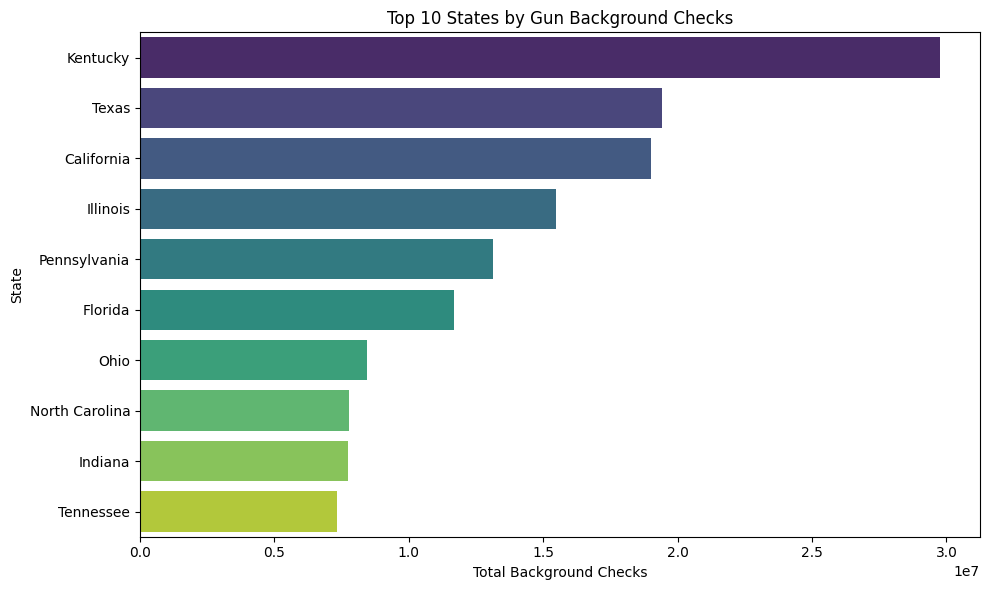

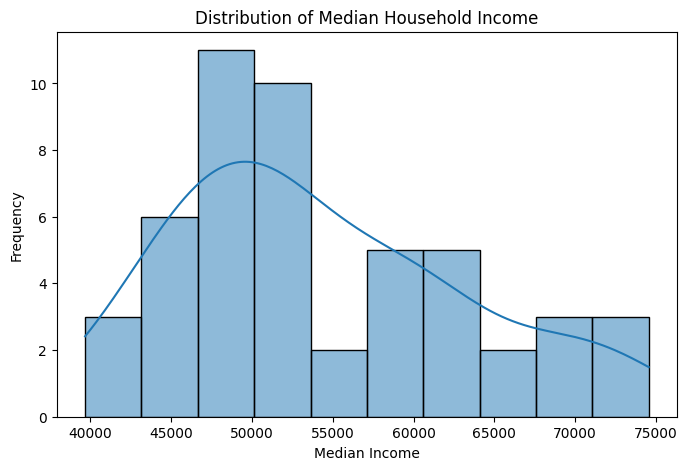

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
import seaborn as sns
import matplotlib.pyplot as plt


# Top 10 states by total background checks
top_10 = filtered_df.sort_values(by='totals', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='totals', y='state', palette='viridis')
plt.title("Top 10 States by Gun Background Checks")
plt.xlabel("Total Background Checks")
plt.ylabel("State")
plt.tight_layout()
plt.show()

# Histogram of median income
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered_df, x='median_income', bins=10, kde=True)
plt.title("Distribution of Median Household Income")
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()

### 2. Bivariate Analysis
Explore relationships between gun background checks and other variables.

🔍 Questions:

Does income relate to gun background checks?

Do states with more veterans have more gun activity?

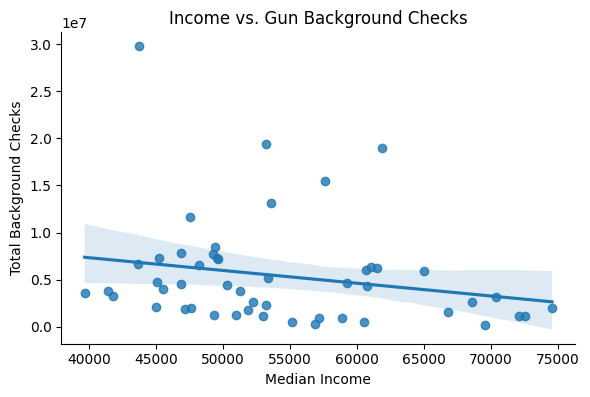

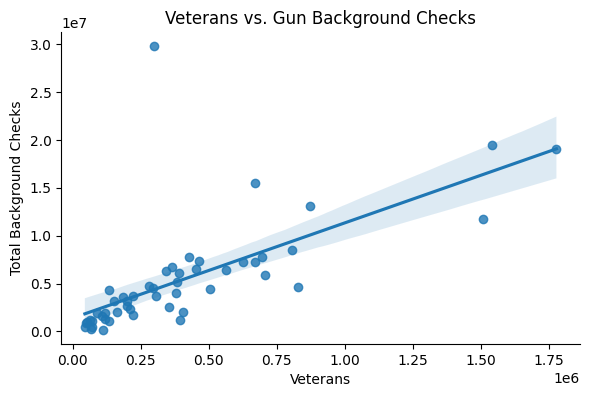

In [17]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#Income vs Gun check
sns.lmplot(data=filtered_df, x='median_income', y='totals', height=4, aspect=1.5)
plt.title("Income vs. Gun Background Checks")
plt.xlabel("Median Income")
plt.ylabel("Total Background Checks")
plt.show()

#Veterans vs Gun check
sns.lmplot(data=filtered_df, x='veterans', y='totals', height=4, aspect=1.5)
plt.title("Veterans vs. Gun Background Checks")
plt.xlabel("Veterans")
plt.ylabel("Total Background Checks")
plt.show()

### 3. Correlation Matrix
Show how all numeric features relate to each other.

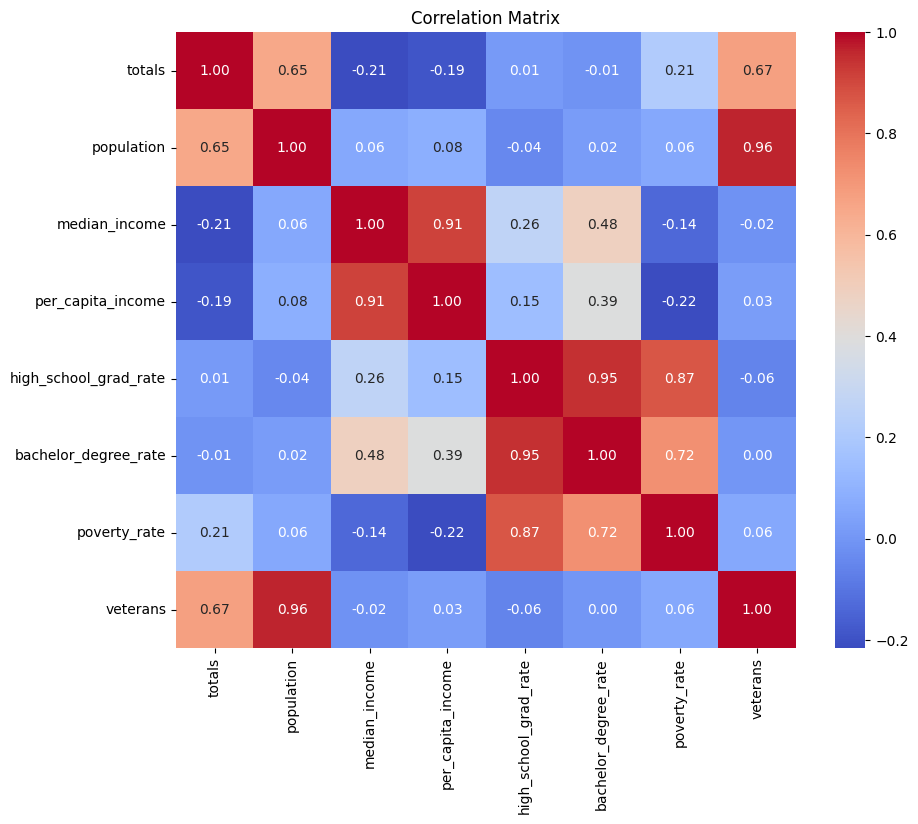

In [18]:
# Correlation heatmap

plt.figure(figsize=(10, 8))
corr = filtered_df.drop(columns='state').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

###📄 Conclusion
This project explored how demographic characteristics across U.S. states relate to gun-related activity, using FBI NICS background check data and U.S. Census data.

1. After cleaning and merging datasets, exploratory data analysis revealed that population size is the strongest driver of gun background checks.

2. Other factors like education level and veteran presence showed weaker trends.

3. Interestingly, income and poverty did not strongly predict gun activity, highlighting the importance of cultural and legislative factors that aren't purely demographic.

These findings suggest that a combination of population, veteran presence, and possibly non-demographic factors (like gun laws or rural/urban dynamics) could better explain state-level gun activity.